In [1]:
# Lecture 6: Bayesian Formalism 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sn

from scipy.stats import norm

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Sufficient Statistics and the Exponential Family
# In this example we are interested in the birth rate of women with college degrees compared to those without. 

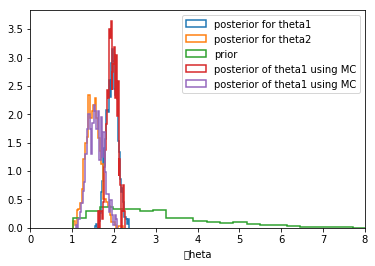

In [7]:
from scipy.stats import gamma
from scipy.stats import poisson
a = 2 # Gamma prior, a,b values 
b = 1 

n1 = 111
sy1 = 217  # sum of y1
n2 = 44 
sy2=66     #sum of y2
N=1000


# ACTUAL VALUES 
# posterior mean 
(a+sy1)/(b+n1) 
(a+sy2)/(b+n2)

# EXACT POSTERIORS


theta1=gamma.rvs(a+sy1, scale=1.0/( b+n1), size=N)
q=plt.hist(theta1, 30,linewidth=1.5,normed=True, histtype='step',   label=u'posterior for theta1')
theta2 = gamma.rvs(a+sy2,scale= 1./(b+n2), size=N)
q=plt.hist(theta2, 30, linewidth=1.5,histtype='step', alpha=1.0,normed=True,   label=u'posterior for theta2') 



th_prior = gamma.rvs(2.0, 1.0, size=N);
plt.hist(th_prior, 30,linewidth=1.5, histtype='step',alpha=1.0, normed=True,   label=u'prior') 


#plt.xlim( [0,8])
plt.xlabel('\theta')



## MONTE CARLO APPROACH - REJECTION METHOD 

a =2.0 
b = 1.0 
prior = lambda theta:  gamma.pdf(theta, a ,b)
pdf_s1 = lambda theta: prior(theta)*  poisson.pmf(sy1, n1*theta)
pdf_s2 = lambda theta:  prior(theta)* poisson.pmf(sy2, n2*theta)


X=np.random.uniform(low=0, high=10, size=10*N)
Yt = np.random.uniform(low=0, high=.01, size=10*N)

idx =Yt < pdf_s1(X)

plt.hist(X[idx], 30,linewidth=1.5,histtype='step', alpha=1.0, normed=True,   label=u'posterior of theta1 using MC')


X=np.random.uniform(low=0, high=10, size=10*N)
Yt = np.random.uniform(low=0, high=.01, size=10*N)

idx =Yt < pdf_s2(X)

plt.hist(X[idx], 30,linewidth=1.5, histtype='step', alpha=1.0, normed=True,  label=u'posterior of theta1 using MC')
plt.xlim([0,8])
plt.legend()


## Finally we can do inference as we wish

In [8]:
# Back to the Gaussian: joint distribution of mean and variance
# Priors - not for my grandmother

(0, 2)

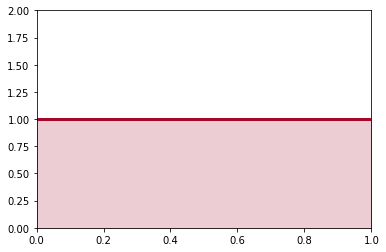

In [9]:
x = np.linspace( 0.000 ,1, 150 )
y = np.linspace( 1.0, 1.0, 150 )
lines = plt.plot( x, y, color="#A60628", lw = 3 )
plt.fill_between( x, 0, y, alpha = 0.2, color = lines[0].get_color() )
plt.autoscale(tight=True)
plt.ylim( 0, 2)

(0, 0.4)

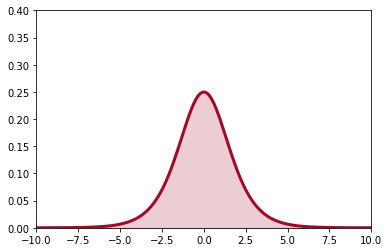

In [10]:
psi = np.linspace( -10 ,10, 150 )
y = np.exp(psi) / (1 + np.exp(psi))**2
lines = plt.plot( psi, y, color="#A60628", lw = 3 )
plt.fill_between( psi, 0, y, alpha = 0.2, color = lines[0].get_color() )
plt.autoscale(tight=True)
plt.ylim( 0, .4)

In [11]:
# Priors loose their powers as N increases

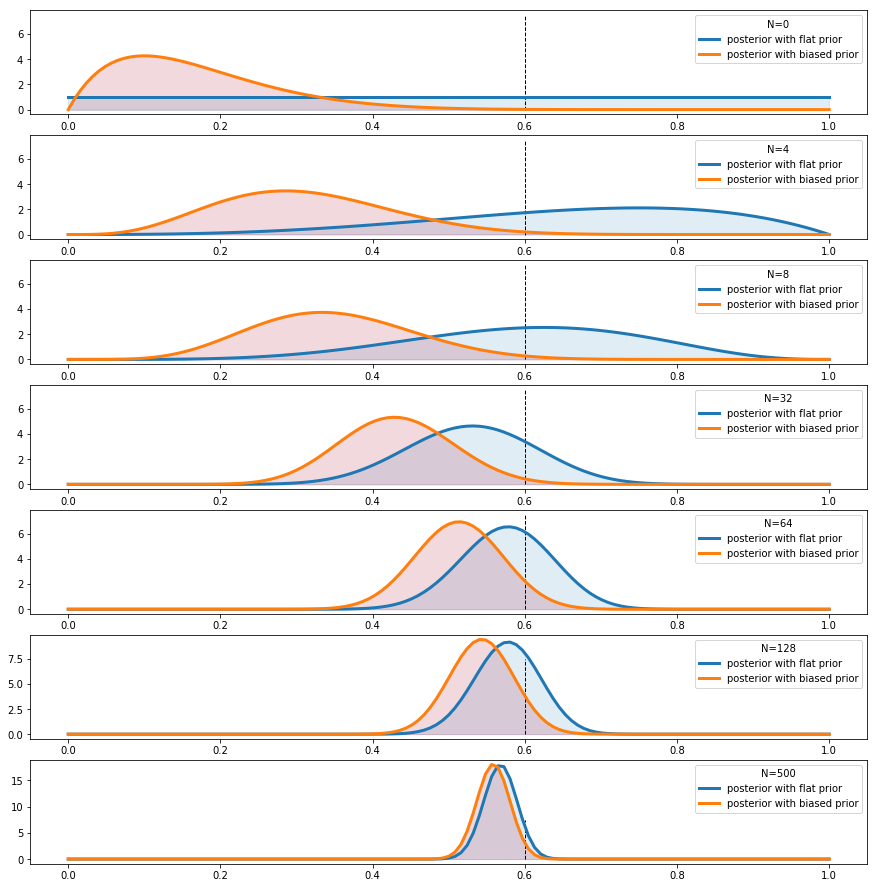

In [12]:
import scipy.stats as stats

plt.figure(figsize=( 15, 18))

p = 0.6
beta1_params = np.array( [1.,1.] )  # FLAT 
beta2_params = np.array( [2,10] )
beta = stats.beta 

x = np.linspace(0.00, 1, 125)
data = stats.bernoulli.rvs(p,size=500)   #LIKELIHOOD

for i,N in enumerate([0,4,8, 32,64, 128, 500]):
    s = data[:N].sum() 
    plt.subplot(8,1,i+1)
    params1 = beta1_params + np.array( [s, N-s] )    # posteriors beta parameters
    params2 = beta2_params + np.array( [s, N-s] )
    
    y1,y2 = beta.pdf( x, *params1), beta.pdf( x, *params2)  # the posterior 
    plt.plot( x,y1, label = r"posterior with flat prior", lw =3 )
    plt.plot( x, y2, label = "posterior with biased prior", lw= 3 )
    plt.fill_between( x, 0, y1, color ="#348ABD", alpha = 0.15) 
    plt.fill_between( x, 0, y2, color ="#A60628", alpha = 0.15) 
    plt.legend(title = "N=%d"%N)
    plt.vlines( p, 0.0, 7.5, linestyles = "--", linewidth=1)
    #plt.ylim( 0, 10)#

In [ ]:
# http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-6.html